# Question 4

In [21]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [22]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt

In [30]:
# assign the original image
loaded_image = cv2.imread('4th Q Image.png')
# Convert the image to grayscale
gray_image = cv2.cvtColor(loaded_image, cv2.COLOR_BGR2GRAY)

In [31]:
#a common function to app 2d fft for a given image
def apply_2d_fourier_transform(image):
    f_transform = np.fft.fft2(image)
    return np.fft.fftshift(f_transform)

#a common function to display a given set of images
def display_images(images, titles, figsize=(20, 5)):
    num_images = len(images)
    
    plt.figure(figsize=figsize)
    
    for i in range(num_images):
        plt.subplot(1, num_images, i+1), plt.imshow(images[i], cmap="gray"), plt.title(titles[i])
    
    plt.show()



## a)

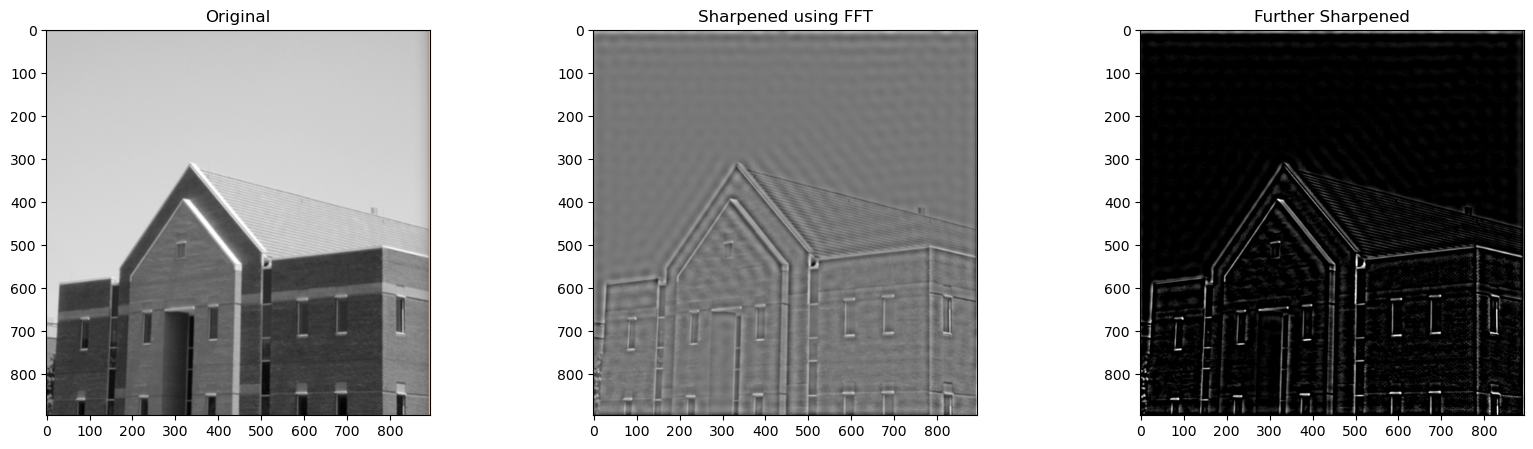

In [32]:
f_transform_shifted = apply_2d_fourier_transform(gray_image)

#Circular mask implementation
rows, cols = gray_image.shape
crow, ccol = rows // 2, cols // 2
# Assign a radius for the image
radius = 28
# Apply the cicular mask
mask = np.ones((rows, cols), np.uint8)
cv2.circle(mask, (ccol, crow), radius, 0, -1)
# Apply the cicular mask to the shifted Fourier transform
f_transform_shifted_and_filtered = f_transform_shifted * mask

# Inverse Fourier Transform
edge_sharpened_image = np.fft.ifft2(np.fft.ifftshift(f_transform_shifted_and_filtered)).real

#further Sharpening
kernel_size =25
blurred_image = cv2.GaussianBlur(edge_sharpened_image, (kernel_size, kernel_size), 5)
unsharp_mask = edge_sharpened_image - blurred_image
further_sharpened_image = (edge_sharpened_image + 3* unsharp_mask).clip(0, 255)

# Display original, high-pass filtered, and sharpened images
images_to_display = [loaded_image, edge_sharpened_image, further_sharpened_image]
titles = ["Original", "Sharpened using FFT", "Further Sharpened"]
display_images(images_to_display, titles)


## b)

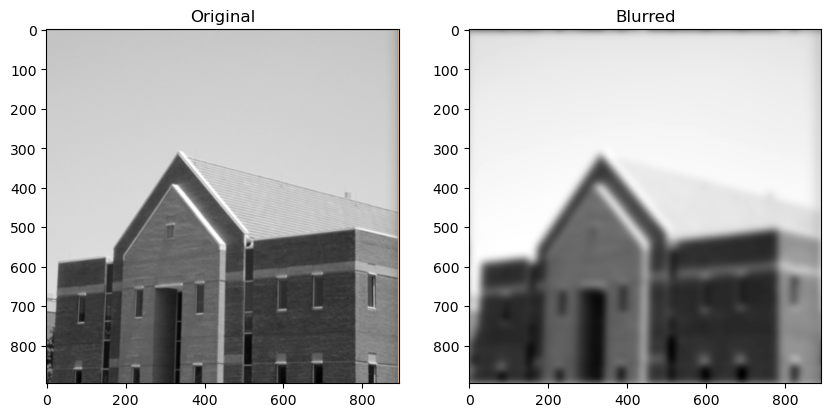

In [33]:
f_transform_shifted = apply_2d_fourier_transform(gray_image)

# Create a Gaussian filter
rows, cols = gray_image.shape
crow, ccol = rows // 2, cols // 2
x = np.arange(cols) - ccol
y = np.arange(rows) - crow
xx, yy = np.meshgrid(x, y)
gaussian_filter = np.exp(-(xx**2 + yy**2) / (2 * 15**2))

# Apply Gaussian filter in Fourier domain
gaussian_filtered = f_transform_shifted * gaussian_filter

# Inverse Fourier Transform
blurred_image = np.fft.ifft2(np.fft.ifftshift(gaussian_filtered)).real

images_to_display = [loaded_image, blurred_image]
titles = ["Original", "Blurred"]
display_images(images_to_display, titles,(10, 5))

# c)

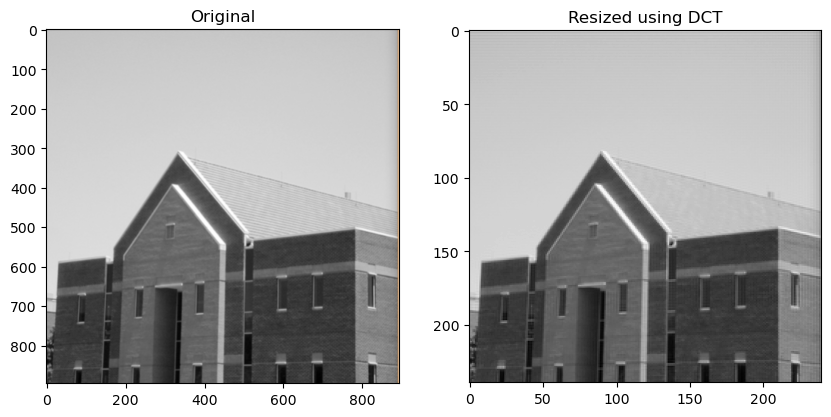

In [34]:
# Apply DCT
dct_transform = cv2.dct(np.float32(gray_image))

# Specify the desired size
new_size = (240, 240)

# Resize using cropping and preserving DCT coefficients
rows, cols = dct_transform.shape
start_row, start_col = 0, 0
end_row, end_col = min(rows, new_size[0]), min(cols, new_size[1])
resized_dct_transform = dct_transform[start_row:end_row, start_col:end_col]

# Inverse DCT
resized_img = cv2.idct(np.float32(resized_dct_transform))

images_to_display = [loaded_image, resized_img]
titles = ["Original", "Resized using DCT"]
display_images(images_to_display, titles,(10, 5))

# d)

In [35]:
# A function to compare the original and compressed file sizes
def size_compare(image1,image2):
    # Size of the original image
    _, image1_bytes = cv2.imencode(".png", image1)  
    _, image2_bytes = cv2.imencode(".png", image2) 
    # Get the size of the image in kilobytes
    file1_size_kb = len(image1_bytes.tobytes()) / 1024
    file2_size_kb = len(image2_bytes.tobytes()) / 1024
    print(f"Original Size: {file1_size_kb:.2f} KB")
    print(f"Compressed Size: {file2_size_kb:.2f} KB")

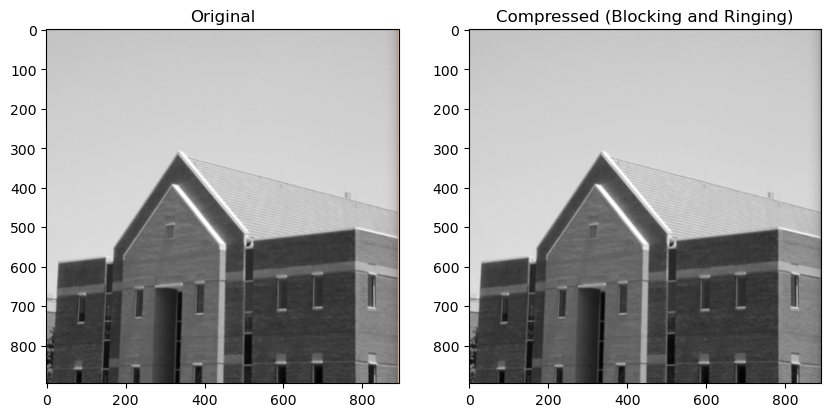

Original Size: 626.43 KB
Compressed Size: 273.49 KB


In [36]:
# Apply DCT
dct_transform = cv2.dct(np.float32(gray_image))

# Simulate compression by quantizing DCT coefficients
quantization_factor = 1
quantized_dct_transform = np.round(dct_transform / quantization_factor) * quantization_factor

# Inverse DCT to obtain the compressed image
compressed_img = cv2.idct(np.float32(quantized_dct_transform))

images_to_display = [loaded_image, compressed_img]
titles = ["Original", "Compressed (Blocking and Ringing)"]
display_images(images_to_display, titles,(10, 5))

size_compare(loaded_image,compressed_img)